## svm classifier

In [54]:
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
# define custom class to fix bug in xgboost 1.0.2
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


In [55]:
data=pd.read_csv("dataeyedisease/DATA.csv")
dataset = data.assign(pathology=[2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 2, 3, 1, 1, 3, 1, 2, 1, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 2, 1, 1, 3, 2, 3, 2,3,3,1,3,1,2,3,3,3,2,1,3,1,3,3])


In [80]:
X=dataset.iloc[:,1:-1]
y=dataset.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print (f"train: {X_train.shape} {X_test.shape}")
print (f"test: {y_train.shape} {y_test.shape}")

train: (48, 12) (12, 12)
test: (48,) (12,)


In [83]:
model=SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [84]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))



0.6666666666666666
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       0.88      0.78      0.82         9

    accuracy                           0.67        12
   macro avg       0.62      0.43      0.50        12
weighted avg       0.82      0.67      0.73        12



In [85]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores.mean())

0.4444444444444445


## Pearson Correlation

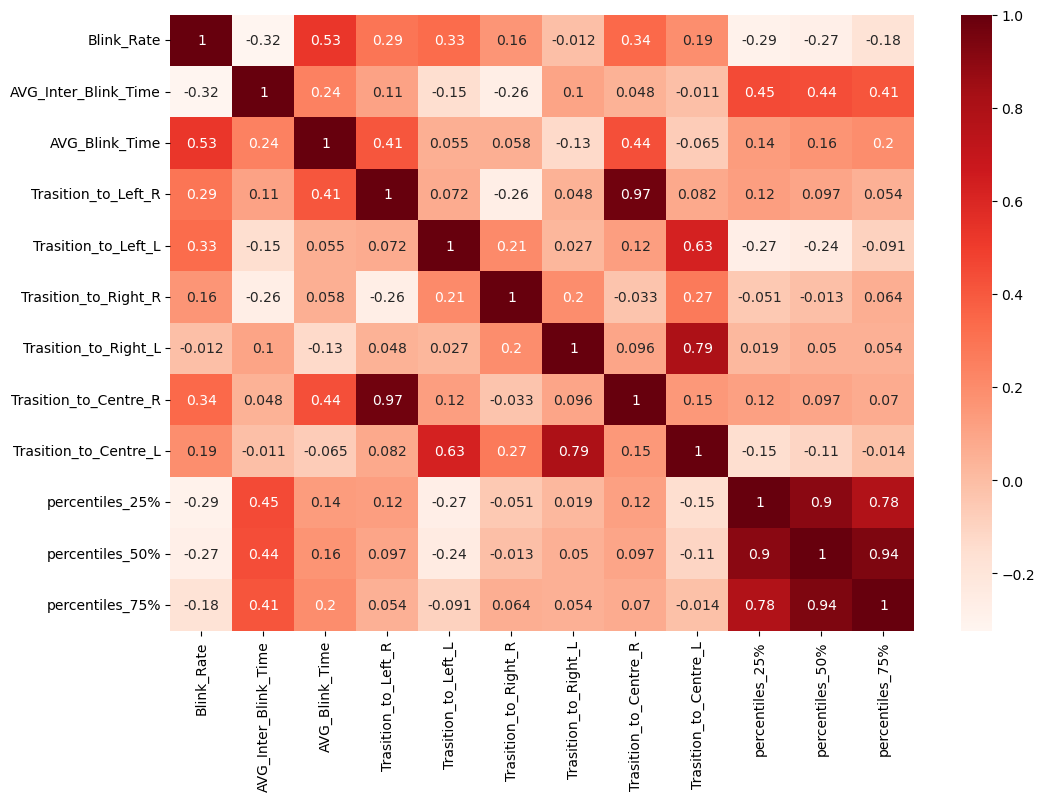

In [81]:
plt.figure(figsize=(12,8))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# ANOVA feature selection for numeric input and categorical output


In [86]:
from numpy import array 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import make_pipeline
##X.shape
anova_filter=SelectKBest(f_classif, k=5)
X_new = anova_filter.fit_transform(X, y)
#print(X_new)
#X_new.shape	
filter = anova_filter.get_support()
##print(filter)
df2 = dataset[dataset.columns[~dataset.columns.isin(['pathology','ID']) ]]
features = list(df2.loc[:,filter].columns)
print("All features:")
print(features)



All features:
['Trasition_to_Left_R', 'Trasition_to_Left_L', 'Trasition_to_Right_R', 'Trasition_to_Right_L', 'Trasition_to_Centre_L']


In [89]:
from sklearn.metrics import classification_report

clf = SVC(kernel="linear")
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

y_pred = anova_svm.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
##print(accuracy)
##print(classification_report(y_test, y_pred))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores.mean())

0.4444444444444445


In [91]:
from sklearn.metrics import classification_report

clf = SVC(kernel="linear")
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

y_pred = anova_svm.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
##print(accuracy)
##print(classification_report(y_test, y_pred))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores.mean())

0.4444444444444445


In [ ]:
import sklearn
print(sklearn.__version__)

## RFE for svm classification problems

In [ ]:
# make a prediction with an RFE pipeline
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

# create pipeline
model=SVC(kernel="linear")
rfe = RFE(estimator=model, n_features_to_select=5)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores.mean())
# report performance
# fit RFE
rfe.fit(X, y)
# summarize all features
ranking=[]
for i in range(X.shape[1]):
    ranking.append(1*100/rfe.ranking_[i])
    #print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

df2 = dataset[dataset.columns[~dataset.columns.isin(['pathology','ID']) ]]
features = list(df2.loc[:,rfe.support_].columns)
print("feature selected:")
print(features)

## plot features ranks

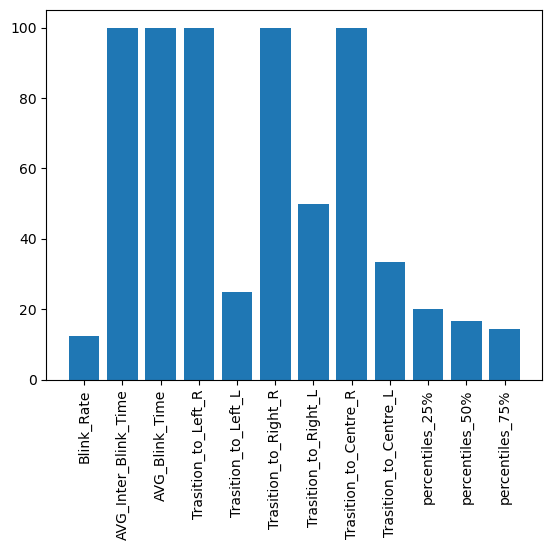

In [74]:
import matplotlib.pyplot as plt
plt.bar(range(len(ranking)), ranking)
features=dataset.columns[1:13]
plt.xticks(range(len(ranking)), features)
plt.xticks(rotation=90)
plt.show()